## =================== Python Environment Set up ===================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [2]:
# read file in to Data frame
PATH = r"ECA_data.csv"
DF = pd.read_csv(PATH)

## =================== Question 1 ===================
#### Categorical Variables: **GENDER, EDUCATION, MARITAL, S(n), RATING**
#### Numerical Variables: **ID, LIMIT, BALANCE, INCOME, AGE, B(n), R(n)**

## =================== Question 2 ===================

### Overview of data that requires cleaning

#### Checks for Duplicated Rows based on 'ID' that needs to be removed

In [3]:
DF[DF.duplicated(subset=['ID'],keep=False)]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
131,132,200000,1270.675,188181,0,1,2.0,1.0,40,-1,...,32333,12610,7850,977,9205,13587,7850,0,9205,0
132,132,200000,1270.675,188181,0,1,2.0,1.0,40,-1,...,32333,12610,7850,977,9205,13587,7850,0,9205,0
378,378,240000,39804.975,256476,0,1,2.0,2.0,35,0,...,232729,223431,226361,223508,238587,10000,8000,9000,19000,9000
379,378,240000,39804.975,256476,0,1,2.0,2.0,35,0,...,232729,223431,226361,223508,238587,10000,8000,9000,19000,9000
421,420,30000,1883.700,32877,1,1,1.0,2.0,23,2,...,10454,11862,12104,12351,8000,2000,242,247,2000,0
422,420,30000,1883.700,32877,1,1,1.0,2.0,23,2,...,10454,11862,12104,12351,8000,2000,242,247,2000,0


#### R3 Column is in object type and has characters like '$' and ',' that needs to be removed to convert column into numerical data type

In [4]:
#Column "R3" has additional '$' signs in value that needs to be stripped away
np.sort(DF["R3"].unique())

array(['$0', '$13,069', '$2,089', ..., '997', '998', '999'], dtype=object)

#### Overview of AGE Column has illogical values like '-1' and '199' that needs to be either replaced/removed

In [5]:
# Get an overview of unique values in column (Notice: -1 & 199)
np.sort(DF["AGE"].unique())

array([ -1,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  79,  80, 199], dtype=int64)

##### AGE=-1 : Mostly customers that has cleared their payment within the first bill

In [6]:
DF[DF["AGE"].isin([-1])]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
664,662,20000,1238.125,10000,0,0,1.0,2.0,-1,0,...,7860,0,0,0,0,0,0,0,0,0
4242,4240,360000,2234.400,415985,0,0,1.0,1.0,-1,0,...,0,0,0,0,0,0,0,0,0,0
15358,15356,250000,105.525,255854,0,1,2.0,2.0,-1,0,...,1867,2470,3887,4731,8710,2661,3887,1000,4000,1000
18165,18163,240000,39785.550,230383,0,0,1.0,2.0,-1,0,...,231891,240146,245552,91382,93177,12000,10373,3403,4000,4000
18166,18164,70000,811.650,68051,0,0,1.0,2.0,-1,-1,...,323,0,0,0,0,0,0,0,0,0


##### AGE=199 : Has more clients that has more than 1 payment

In [7]:
# AGE = 199
# Will use Random Normal distribution of age based on "RATING=0" and "MARITAL=1" criteria
# Require: mean & Std dev.
DF[DF["AGE"].isin([199])]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
535,533,160000,87.150,178881,0,1,1.0,1.0,199,2,...,135,0,0,0,508,0,0,0,508,1287
1617,1615,30000,3054.450,18447,0,1,3.0,1.0,199,0,...,18964,20442,21592,23079,24529,1800,1801,2001,2000,2001
7833,7831,30000,5063.275,25640,0,1,2.0,1.0,199,2,...,30109,29349,29400,30000,0,0,1000,600,0,0
18082,18080,20000,2550.800,17393,0,0,3.0,1.0,199,0,...,16318,17388,17850,17737,27240,1354,2113,1000,1000,1000
18282,18280,30000,4679.850,16676,0,0,2.0,2.0,199,0,...,29095,30819,29214,29478,23384,2500,0,910,1000,1000


#### Overview of NaN affected columns

In [8]:
#NaN Overview
DF.isna().sum()

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

##### EDUCATION Column : 13 Affected rows

In [9]:
# 13 Affected rows
# Will replace with Modal value
DF[DF["EDUCATION"].isna()]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
3400,3398,350000,891.625,344631,0,1,NaN,2.0,53,-1,...,4815,61044,22611,1385,6043,61349,22687,1389,6058,1153
3876,3874,210000,448.525,211085,0,0,NaN,2.0,45,0,...,5854,1032,788,3499,3372,1032,788,3565,3372,15381
5650,5648,100000,1337.350,95891,0,0,NaN,2.0,37,0,...,0,0,0,0,0,0,0,0,0,0
5665,5663,200000,0.000,187245,0,0,NaN,2.0,40,0,...,0,200,1000,0,0,200,1000,0,0,0
6183,6181,230000,1468.950,232051,0,1,NaN,2.0,47,-1,...,5743,1336,255,5425,4838,1598,0,5425,4838,3840
8689,8687,50000,7831.075,58331,0,1,NaN,1.0,40,0,...,46229,46798,47647,40500,41921,2298,2100,2500,1921,8432
8799,8797,200000,3003.000,201126,0,1,NaN,2.0,30,-1,...,7289,2868,9470,5816,7809,0,9470,5834,7809,2886
9431,9429,130000,4194.750,143669,0,0,NaN,NaN,42,0,...,23181,18912,19960,81985,80189,1700,2000,63000,2885,3000
11253,11251,200000,2557.975,209352,0,1,NaN,NaN,46,-1,...,1261,8187,1261,1261,1261,8187,1261,1261,1261,1261
12003,12001,220000,0.000,255282,0,1,NaN,1.0,35,0,...,319,10567,319,319,319,10567,319,319,319,2420


##### MARITAL Column : 38 Affected rows

In [10]:
# 38 Affected rows
# Generate Random Normally distributed values
print(len(DF[DF["MARITAL"].isna()]))
DF[DF["MARITAL"].isna()].iloc[:3,:]

38


,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
521,519,290000,9195.725,294806,0,1,2.0,NaN,49,0,...,53829,53841,54486,55198,55878,1926,1931,1989,2002,2028
694,692,140000,13279.525,151880,0,0,3.0,NaN,47,0,...,67073,57233,52295,49047,38796,5017,10012,10013,3010,6015
819,817,80000,1237.250,74355,0,1,3.0,NaN,37,0,...,3087,5210,3882,4785,1000,5215,3882,4785,1968,0


### Cleaning dataset

#### Pre-Processing Task 1a: Dropping of duplicated ID rows

In [11]:
# Drops duplicated row and keep first occurence of the duplicate only
DF = DF.drop_duplicates(subset=["ID"],keep='first')

#### Pre-Processing Task 1b: Dropping of rows
Removes rows with AGE = -1

In [12]:
# drop these rows completely
DF = DF[~DF["AGE"].isin([-1])]

#### Pre-Processing Task 2a: Replacing AGE=199 with randomly generated Values (with normal distribution)

##### Create a reference data set to get mean and standard deviations as required
Split data affected by AGE=199 for easier value replacements later

In [13]:
# create clean data to generate required random data 
# Dataframe without NaN
clean_DF = DF.copy()
clean_DF.dropna(axis=0, how="any", inplace=True)

# Drops rows with 2 both EDUCATION and MARITAL having NaN
# As replacing both values might introduce more variability in results
# Total of 4 rows dropped here
DF = DF.dropna(subset=["EDUCATION", "MARITAL"], how='all')

# Dataframe without illogical AGE values
clean_DF = clean_DF[~clean_DF["AGE"].isin([199])]

# Dataframe with illogical age values to be replaced
DF_AGE_199 = DF[DF["AGE"]==199]

# Displays ages in clean_DF (for reference)
# clean_DF["AGE"].unique()

Generate Random Integers with normal distribution based on criteria of RATING=0 and MARITAL=1 from reference data

In [14]:
# Narrow down DF to get variables needed to generate random age with normal distribution
temp_df = clean_DF[(clean_DF["RATING"]==0) & (clean_DF["MARITAL"]==1)]

# Generate Normally distributed age and replace it column values
age_list = np.random.normal( loc = int(temp_df["AGE"].median()) , scale = round(temp_df["AGE"].std(),2) , size= len(DF_AGE_199))
age_list = list(map(int, age_list))

# Replace values affected with randomly generated Integers with normal distributions
DF_AGE_199["AGE"] = age_list                                                        # This will throw a warning, can ignore it.

C:\Users\mkumar\AppData\Local\Temp\ipykernel_25324\3651501711.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_AGE_199["AGE"] = age_list                                                        # This will throw a warning, can ignore it.


#### Pre-Processing Task 2b: Replacing NaN with modal/random values

In [15]:
# Handle EDUCATION NaN with Modal values
NAN_EDU_DF = DF[DF["EDUCATION"].isna()]                           # Create a dataframe only for EDUCATION with NaN
EDU_LIST = [DF["EDUCATION"].mode().item()] * len(NAN_EDU_DF)      # Create a list of values based on education Modal value

# Handle MARITAL NaN with randomly generated Integers
NAN_MAR_DF = DF[DF["MARITAL"].isna()]                             # Create a dataframe only for MARITAL with NaN
marital_list = np.random.randint(3, size=len(NAN_MAR_DF))         # Generates list of random integers from 0 - 2

# These will throw a warning, can ignore it.
NAN_MAR_DF["MARITAL"] = marital_list                              # Replace NaN with generated values
NAN_EDU_DF["EDUCATION"] = EDU_LIST                                # Replace NaN with modal values

C:\Users\mkumar\AppData\Local\Temp\ipykernel_25324\2964461751.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAN_MAR_DF["MARITAL"] = marital_list                              # Replace NaN with generated values
C:\Users\mkumar\AppData\Local\Temp\ipykernel_25324\2964461751.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAN_EDU_DF["EDUCATION"] = EDU_LIST                                # Replace NaN with modal values


#### Pre-Requisite: Combine Cleaned dataframes together

In [16]:
# ensure all column types are the same before combination
NAN_MAR_DF["MARITAL"] = NAN_MAR_DF["MARITAL"].astype('float64')

# combine data segments
frames = [ clean_DF, DF_AGE_199, NAN_MAR_DF, NAN_EDU_DF]
DF_CLEAN = pd.concat(frames)

C:\Users\mkumar\AppData\Local\Temp\ipykernel_25324\1667543211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAN_MAR_DF["MARITAL"] = NAN_MAR_DF["MARITAL"].astype('float64')


#### Pre-Processing Task 3: Stripping special characters from R3 Column

In [17]:
# Removes '$' and ',' and change column type into integer 64
DF_CLEAN[ "R3" ] = DF_CLEAN[ "R3" ].apply( lambda x: x.strip('$,') )
DF_CLEAN[ "R3" ] = DF_CLEAN[ "R3" ].apply( lambda x: x.replace(",","") )

#### Pre-Processing Task 4: Discretisation
Converts EDUCATION, MARITAL & R3 into discrete column types

In [18]:
# DISCRETISATION of column EDUCATION, MARITAL & R3.
discretisation_list = ["EDUCATION","MARITAL","R3"]
DF_CLEAN[ discretisation_list ] = DF_CLEAN[ discretisation_list ].astype('int64')
DF_CLEAN.head(3)

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.00,235822,1,1,1,2,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.05,278481,0,0,2,2,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.85,431993,0,0,3,1,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000


#### Verification of cleaned dataset

In [19]:
DF_CLEAN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18759 entries, 0 to 16039
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18759 non-null  int64  
 1   LIMIT      18759 non-null  int64  
 2   BALANCE    18759 non-null  float64
 3   INCOME     18759 non-null  int64  
 4   RATING     18759 non-null  int64  
 5   GENDER     18759 non-null  int64  
 6   EDUCATION  18759 non-null  int64  
 7   MARITAL    18759 non-null  int64  
 8   AGE        18759 non-null  int64  
 9   S1         18759 non-null  int64  
 10  S2         18759 non-null  int64  
 11  S3         18759 non-null  int64  
 12  S4         18759 non-null  int64  
 13  S5         18759 non-null  int64  
 14  B1         18759 non-null  int64  
 15  B2         18759 non-null  int64  
 16  B3         18759 non-null  int64  
 17  B4         18759 non-null  int64  
 18  B5         18759 non-null  int64  
 19  R1         18759 non-null  int64  
 20  R2    

## ====================== Question 3 ======================

#### Chart 1: Histogram - Distribution of Age in credit facility’s customers

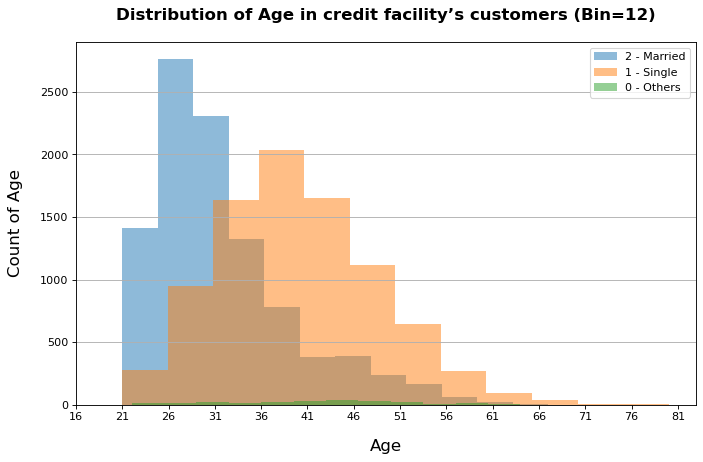

,Marital Status,Mean_Age,Median_Age,Mode_Age
0,Married,31.56,29,27
1,Single,39.90,39,37
2,Others,42.05,43,41


In [20]:
# define plot settings
BINS = 12
COL = "AGE"
TITLE = "Distribution of Age in credit facility’s customers (Bin=12)"
Y_LABEL = "Count of Age"
X_LABEL = "Age"

legend_dict = {
    '0':"0 - Others",
    '1':"1 - Single",
    '2':"2 - Married"
}

data_dict = {
    "Marital Status": ["Married","Single","Others"],
    "Mean_Age":[],
    "Median_Age":[],
    "Mode_Age":[]
}

# Data splits
df_interested = DF_CLEAN.copy()

# create figure and plot histograms
plt.figure(figsize=(10, 6), dpi=80)

for marital_stat in [2,1,0]:
    df_tmp = DF_CLEAN[DF_CLEAN["MARITAL"]==marital_stat]
    DAT = df_tmp[COL]
    plt.hist(DAT,alpha=0.5,bins = BINS,label=legend_dict[str(marital_stat)])

    data_dict["Mean_Age"]   = data_dict["Mean_Age"] + [round(df_tmp[COL].mean(),2)]
    data_dict["Median_Age"] = data_dict["Median_Age"] + [int(df_tmp[COL].median())]
    try: data_dict["Mode_Age"]   = data_dict["Mode_Age"] + [df_tmp[COL].mode().item()]
    except: data_dict["Mode_Age"]   = data_dict["Mode_Age"] + [df_tmp[COL].mode()[0]]



# Plots settings
plt.title(label=TITLE,pad=20,fontsize=15,weight='bold')
plt.xlabel(X_LABEL,labelpad=15,fontsize=15)
plt.ylabel(Y_LABEL,labelpad=15,fontsize=15)
plt.xticks([i for i in range(int(DF_CLEAN[COL].min())-5,int(DF_CLEAN[COL].max()+5),5)])
plt.legend()
plt.grid(True,which="Major",axis='y')
plt.show()

# Display Data Table
pd.DataFrame(data_dict)

#### Chart 2: Boxplot - Rating Income

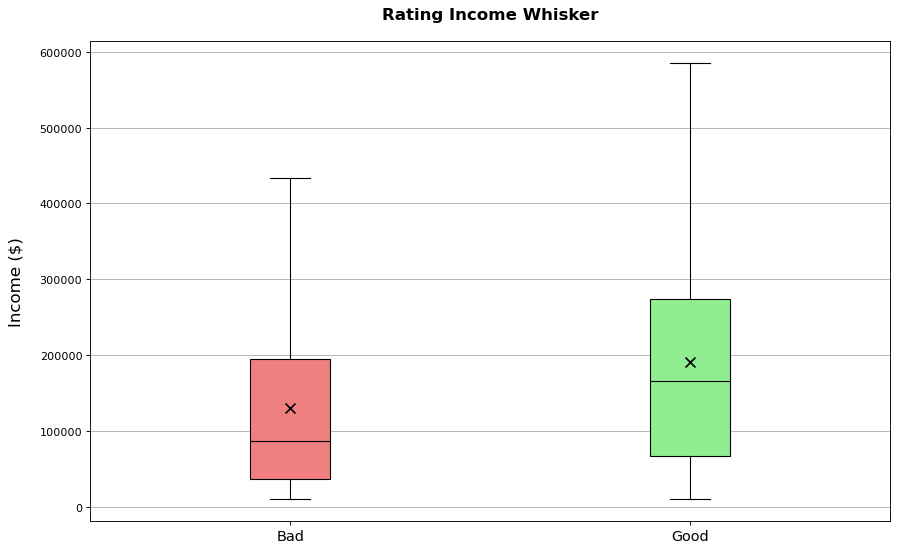

,Rating,Lower Quartile,Median,Upper Quartile,Mean
0,Bad,36967,86787,195536,130895.24
1,Good,67690,165886,274618,190930.19


In [21]:
from numpy import percentile

# define data
COL = "INCOME"
TITLE = "Rating Income Whisker"
Y_LABEL = "Income ($)"

# Data splits
df_interested = DF_CLEAN.copy()

# initialise vairables
data = []
mean_dat = []

legend_dict = {
    "0":"Good",
    "1":"Bad"
}

df_dict = {
    "Rating":[],
    "Lower Quartile":[],
    "Median":[],
    "Upper Quartile":[],
    "Mean":[]
}

for rate in DF_CLEAN["RATING"].unique():
  df_tmp = DF_CLEAN[DF_CLEAN["RATING"]==rate]
  data.append(df_tmp[COL])
  mean_dat.append(round(df_tmp[COL].mean(),2))
  df_dict["Rating"] = df_dict["Rating"] + [legend_dict[str(rate)]]

# Calculation of data tables (mean,upper/lower quartile, median)
  quartiles = percentile(df_tmp[COL], [25, 50, 75])
  df_dict["Upper Quartile"] = df_dict["Upper Quartile"] + [int(quartiles[2])]
  df_dict["Median"] = df_dict["Median"] + [int(df_tmp[COL].median())]
  df_dict["Lower Quartile"] = df_dict["Lower Quartile"] + [int(quartiles[0])]
  df_dict["Mean"] = df_dict["Mean"] + [round(df_tmp[COL].mean(),2)]

# data plottings
fig_sz = (10,6)
ax = plt.figure(figsize=fig_sz, dpi=80).add_axes([0, 0, 1, 1])
bp = ax.boxplot(data,patch_artist=True,whis=1.5,showfliers=False,widths=0.2)
ax.scatter( x = [1,2], y = mean_dat,
            color = 'black',zorder=3,marker='x',s=80)

# Boxplot settings
for i,T in enumerate(DF_CLEAN["RATING"].unique()):
  if i == 0: bp["boxes"][i].set_facecolor("lightcoral")
  else: bp["boxes"][i].set_facecolor("lightgreen")
  bp["medians"][i].set_color('black')

# Chart settings
plt.title(label=TITLE,pad=20,fontsize=15,weight='bold')
plt.ylabel(Y_LABEL,labelpad=15,fontsize=15)
plt.xticks([1,2],labels=df_dict["Rating"],fontsize=13)
plt.grid(True,which="Major",axis='y')
plt.show()

# # make into display data table
pd.DataFrame(df_dict)

#### Chart 3: Area plot - Average Repayment & Billable amount by month

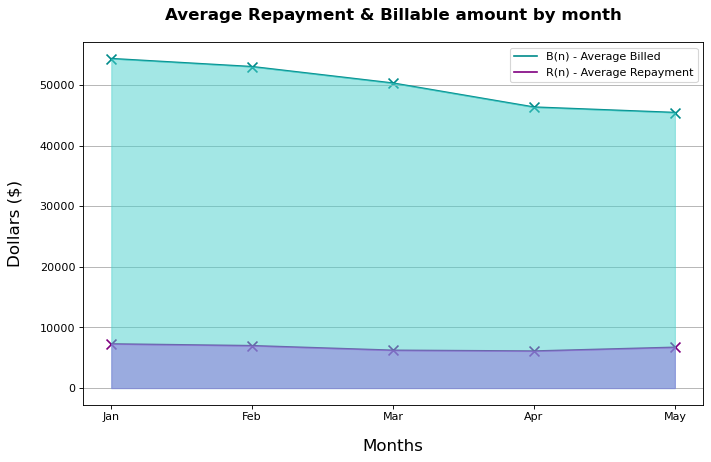

,Months,Average_Repayment,Average_Billed
0,Jan,7280.05,54349.69
1,Feb,6987.16,53019.22
2,Mar,6231.77,50304.62
3,Apr,6101.50,46347.99
4,May,6722.10,45452.32


In [22]:
TITLE = "Average Repayment & Billable amount by month"
Y_LABEL = "Dollars ($)"
X_LABEL = "Months"
DF_CLEAN

r_list = []
b_list = []
mth_list = ['Jan',"Feb","Mar","Apr","May"]

for i in range(1,6): 
  b_list.append(round(DF_CLEAN[~DF_CLEAN['B'+str(i)].isin([-1,0])]['B'+str(i)].mean(),2))
  r_list.append(round(DF_CLEAN[~DF_CLEAN['R'+str(i)].isin([-1,0])]['R'+str(i)].mean(),2))

df_dict = {
    "Months":mth_list,
    "Average_Repayment":r_list,
    "Average_Billed":b_list
}

# create figure
ax = plt.figure(figsize=(10,6), dpi=80)

# plot lines
plt1 = plt.plot(df_dict["Months"], df_dict["Average_Billed"],zorder=3,color='darkcyan',label="B(n) - Average Billed")
plt.scatter(df_dict["Months"],df_dict["Average_Billed"],marker='x',s=80,c="darkcyan")

plt2 = plt.plot(df_dict["Months"], df_dict["Average_Repayment"],zorder=3,color='purple',label="R(n) - Average Repayment")
plt.scatter(df_dict["Months"],df_dict["Average_Repayment"],marker='x',s=80,c="purple")

# shade area below lines
plt.fill_between(df_dict["Months"],df_dict["Average_Billed"],alpha=0.5,color='mediumturquoise',zorder=3)
plt.fill_between(df_dict["Months"],df_dict["Average_Repayment"],alpha=0.5,color='mediumpurple',zorder=3)

# plot display settings for bar plots
plt.ylabel(Y_LABEL,labelpad=15,fontsize=15)
plt.xlabel(X_LABEL,labelpad=15,fontsize=15)
plt.grid(True,which="Major",axis='y')

# Plot settings
plt.title(label=TITLE,pad=20,fontsize=15,weight='bold')
plt.legend()
plt.show()

pd.DataFrame(df_dict)

#### Chart 4: Scatterplot - Delayed Payments by Education

C:\Users\mkumar\AppData\Local\Temp\ipykernel_25324\3657140770.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interested["S_Total"] = df_interested["S1"] + df_interested["S2"] + df_interested["S3"] + df_interested["S4"] + df_interested["S5"] # This will  throw a warning


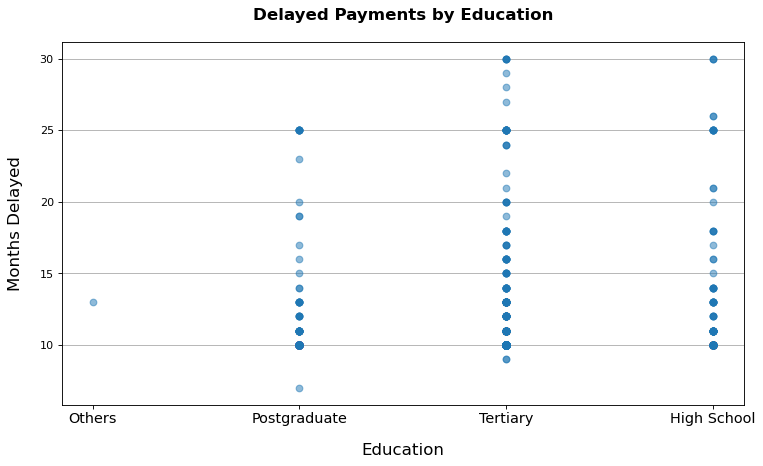

,Education,Number_Customers,Average Months Delayed
0,Others,1,13.00
1,Postgraduate,203,11.27
2,Tertiary,468,12.08
3,High School,167,12.43


In [23]:
# Define plot settings
TITLE = "Delayed Payments by Education"
Y_LABEL = "Months Delayed"
X_LABEL = "Education"

# prepare data for plotting
df_interested = DF_CLEAN[(DF_CLEAN["S1"]>0)&(DF_CLEAN["S2"]>0)&(DF_CLEAN["S3"]>0)&(DF_CLEAN["S4"]>0)&(DF_CLEAN["S5"]>0)]
df_interested["S_Total"] = df_interested["S1"] + df_interested["S2"] + df_interested["S3"] + df_interested["S4"] + df_interested["S5"] # This will  throw a warning

# create and plot figure
plt.figure(figsize=(11, 6), dpi=80)
X = df_interested["EDUCATION"]
Y = df_interested["S_Total"]
plt.scatter(X,Y,zorder=3,alpha=0.5)

# Plot settings
X_TICKS = ["Others", "Postgraduate", "Tertiary", "High School"]
plt.xticks([0,1,2,3],labels=X_TICKS,fontsize=13)
plt.title(label=TITLE,pad=20,fontsize=15,weight='bold')
plt.xlabel(X_LABEL,labelpad=15,fontsize=15)
plt.ylabel(Y_LABEL,labelpad=15,fontsize=15)
plt.grid(True,which="Major",axis='y')
plt.show()

tmp = []
tmp_num = []
for edu in [0,1,2,3]:
    tmp.append(round(df_interested[df_interested["EDUCATION"]==edu]["S_Total"].mean(),2))
    tmp_num.append(len(df_interested[df_interested["EDUCATION"]==edu]))

df_dict={
    "Education": X_TICKS,
    "Number_Customers":tmp_num,
    "Average Months Delayed":tmp
}
pd.DataFrame(df_dict)

#### Chart 5: Bar Chart - Average repayment amount by income class

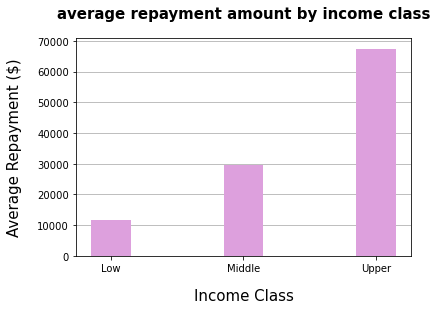

,Income_Class,Average_Repayment
0,Low,11757.73
1,Middle,29580.63
2,Upper,67474.73


In [24]:
# Define plot settings
TITLE = "average repayment amount by income class"
Y_LABEL = "Average Repayment ($)"
X_LABEL = "Income Class"

df_dict = {
  "Income_Class": ["Low","Middle","Upper"],
  "Average_Repayment":[]
}

df_low = DF_CLEAN[DF_CLEAN["INCOME"]<=50000]
df_mid = DF_CLEAN[(DF_CLEAN["INCOME"]>50000)&(DF_CLEAN["INCOME"]<=300000)]
df_upp = DF_CLEAN[DF_CLEAN["INCOME"]>300000]
R_M_list = []

# Sums up all the mean of R(n)
for tmp_df in [df_low,df_mid,df_upp]:
    r_list = []
    for i in range(1,6): r_list.append(round(tmp_df[~tmp_df['R'+str(i)].isin([-1,0])]['R'+str(i)].mean(),2))
    R_M_list.append(np.array(r_list).sum())

df_dict["Average_Repayment"] = R_M_list
    
# plot bars
plt1 = plt.bar(df_dict["Income_Class"], R_M_list,width = 0.3,zorder=3,color='plum')

# plot display settings for bar plots
plt.ylabel(Y_LABEL,labelpad=15,fontsize=15)
plt.xlabel(X_LABEL,labelpad=15,fontsize=15)
plt.grid(True,which="Major",axis='y')

# Plot settings
plt.title(label=TITLE,pad=20,fontsize=15,weight='bold')
plt.show()
pd.DataFrame(df_dict)

## ====================== Question 4 ======================


In [25]:
# Creates correlation matrice for between all column
cor_mat = DF_CLEAN.corr()

# View Top 3 correlation for "B1" only and sort it. 
# Exclude 1st row as B1 will always have 100% correlation with itself
cor_mat.sort_values(by=["B1"],ascending=False)["B1"].iloc[1:4,]

BALANCE    0.950887
B2         0.939007
B3         0.894166
Name: B1, dtype: float64

In [26]:
# least correlation
cor_mat.sort_values(by=["B1"],ascending=False)["B1"].iloc[-3:,]

EDUCATION   -0.011145
RATING      -0.015463
GENDER      -0.033735
Name: B1, dtype: float64

In [27]:
# Full Correlation rankings
cor_mat.sort_values(by=["B1"],ascending=False)["B1"].iloc[1:,]

BALANCE      0.950887
B2           0.939007
B3           0.894166
B4           0.853487
B5           0.824096
LIMIT        0.279529
INCOME       0.277423
R5           0.187251
R4           0.145397
R3           0.145013
R2           0.124807
S1           0.116169
R1           0.113976
S2           0.111526
S4           0.090620
S5           0.088728
S3           0.084920
AGE          0.057497
ID           0.016937
MARITAL     -0.010433
EDUCATION   -0.011145
RATING      -0.015463
GENDER      -0.033735
Name: B1, dtype: float64

Available columns are: ['ID', 'LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER', 'EDUCATION', 'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'B1', 'B2', 'B3', 'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5']
Please Enter Column to perform linear regression with B1: Education
Please Enter value column
Available columns are: ['ID', 'LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER', 'EDUCATION', 'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'B1', 'B2', 'B3', 'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5']
Please Enter Column to perform linear regression with B1: EDUCATION


InvalidIndexError: (slice(None, None, None), None)

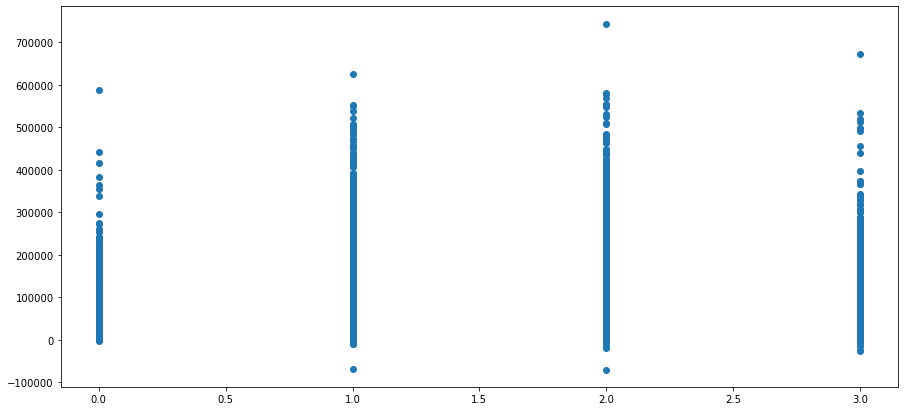

In [28]:
from sklearn.linear_model import LinearRegression

# Prepare data to be fed to the model
# X: BALANCE / LIMIT / INCOME - Recommended: Either of the Top 3 high correlation variables are good, Not logical to use Billable variables to predict 1st payment
# Y: B1

# Gets User Input to find  with variable to regress B1 with 
while True:
  print("Available columns are:",list(DF_CLEAN.columns))
  x_col = input("Please Enter Column to perform linear regression with B1: ")     # Change desired column to do linear regression with B1 here
  if x_col not in DF_CLEAN.columns: print("Please Enter value column")
  else: break

# x_col = "BALANCE"                       # Change desired column to do linear regression with B1 here

# Reads data into X and Y for model feeding
X = DF_CLEAN[[x_col]]
Y = DF_CLEAN['B1']

# perform linear regression
linear_regressor = LinearRegression()     # Create linear regression model base
linear_regressor.fit(X, Y)                # Feed data into model
Y_pred = linear_regressor.predict(X)      # predictions

# plot the model and its predictions against itself
plt.figure(figsize=[15, 7])                                         # Create blank canvas
plt.scatter(X, Y,zorder=3)                                          # Plot raw data of desired column against B1
plt.plot(X, Y_pred, color='black',zorder=3)                         # Plots predicted values from regression model (Black line)

# Chart Aesthetics (X/Y axis labels, grid lines settings, title)
plt.title('\n'+x_col+" Vs B1",fontsize=15,weight='bold',pad=20)
plt.xlabel(x_col,fontsize=13,weight='bold',labelpad=15)
plt.ylabel("B1",fontsize=13,weight='bold',rotation=0,labelpad=15)
plt.grid(True)
plt.show()

## ====================== Question 5 ======================

In [29]:
# Gets Parameters from linear regression model and display it
r_sq = round(linear_regressor.score(X, Y),3)
M    = round(linear_regressor.coef_[0],2)
C    = round(linear_regressor.intercept_,2)
print("Accuracy (R^2):", r_sq)
print("Linear Regression Equation: Y =",M,"X +",C)

Accuracy (R^2): 0.0
Linear Regression Equation: Y = -1094.72 X + 51943.32
